# Pandas 시작하기

## **2. 핵심 기능**

 - Series 또는 DataFrame에 저장된 데이터를 다루는 방법
 

### **2.5 산술 연산과 데이터 정렬**

#### **DataFrame과 Series 간의 연산**

- DataFrame(2차원)과 Series(1차원) 간의 연산 가능

[2차원 배열의 브로드캐스팅]

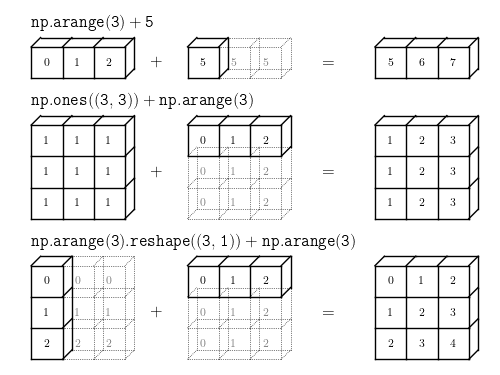

출처: http://www.astroml.org/book_figures/appendix/fig_broadcast_visual.html

In [1]:
import pandas as pd
import numpy as np

arr = np.arange(12.).reshape((3, 4))
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [2]:
arr[0]

array([0., 1., 2., 3.])

In [3]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

     - DataFrame과 Series 간의 연산
        -  Series의 색인을 DataFrame의 컬럼에 맞추고 아래 행으로 전파
        - 색인값을 DataFrame이나 Series의 색인에서 찾을 수 없으면 그 객체는 형식을 맞추기 위해 재색인
        - axis: 연산을 적용할 축 번호
           - axis = 'index' 또는 axis = 0: DataFrame의 행을 따라 연산을 수행

[DataFrame과 Series 간의 연산]

In [4]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
series = frame.iloc[0]
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [5]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [6]:
'''
dataframe의 column과 series의 index를 맞추게 된다. 
series가 전치되듯 바뀌어 열 방향으로 broadcasting하게 된다
'''
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


[색인값을 찾을 수 없는 경우 재색인하기]

In [7]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])
series2

b    0
e    1
f    2
dtype: int64

In [8]:
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


[연산을 적용할 축 번호 사용하기]  

In [9]:
series3 = frame['d']
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [10]:
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [11]:
frame.sub(series3, axis='index') 
#sub: 뺄셈연산
#axis=index또는 axis=0으로 하면 세로 방향으로 내려가며 적용하는 연산이 됨

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


In [12]:
series4 = frame.loc['Utah',:]
series4

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [13]:
frame.sub(series4, axis=1) #이번에는 가로 방향으로 옆으로 이동하는 연산이 이루어짐

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [14]:
frame.sub(series3, axis=1)

,Ohio,Oregon,Texas,Utah,b,d,e
Utah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ohio,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oregon,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **2.6 함수 적용과 매핑**

- pandas 객체도 NumPy의 유니버설 함수를 적용 가능 

**[단항 유니버설 함수]**


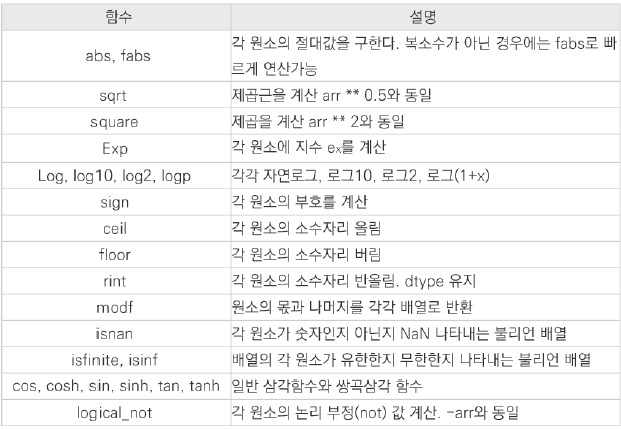

https://ameblo.jp/bluebird1012/entry-12408901465.html

In [15]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,-0.710014,1.690731,-0.406414
Ohio,-0.617738,0.151555,-0.534276
Texas,-0.191664,0.042985,-0.922888
Oregon,0.162220,-0.814882,1.965592


In [16]:
np.abs(frame) #각각의 원소에 적용되는 것

,b,d,e
Utah,0.710014,1.690731,0.406414
Ohio,0.617738,0.151555,0.534276
Texas,0.191664,0.042985,0.922888
Oregon,0.162220,0.814882,1.965592


     - apply: 각 컬럼이나 로우(행)의 1차원 배열에 함수 적용
        - axis = 'index' 또는 axis = 0: 컬럼에 대해 한번만 수행(디폴트)
           - 계산을 적용한 컬럼을 색인으로 하는 Series를 반환
        - axis = 'colums' 또는 axis = 1: 로우에 대해 한번씩 수행
           - 계산을 적용한 로우을 색인으로 하는 Series를 반환
        - apply 메서드에 전달되는 함수는 스칼라 값 또는 여러 값을 가진 Series 반환 가능


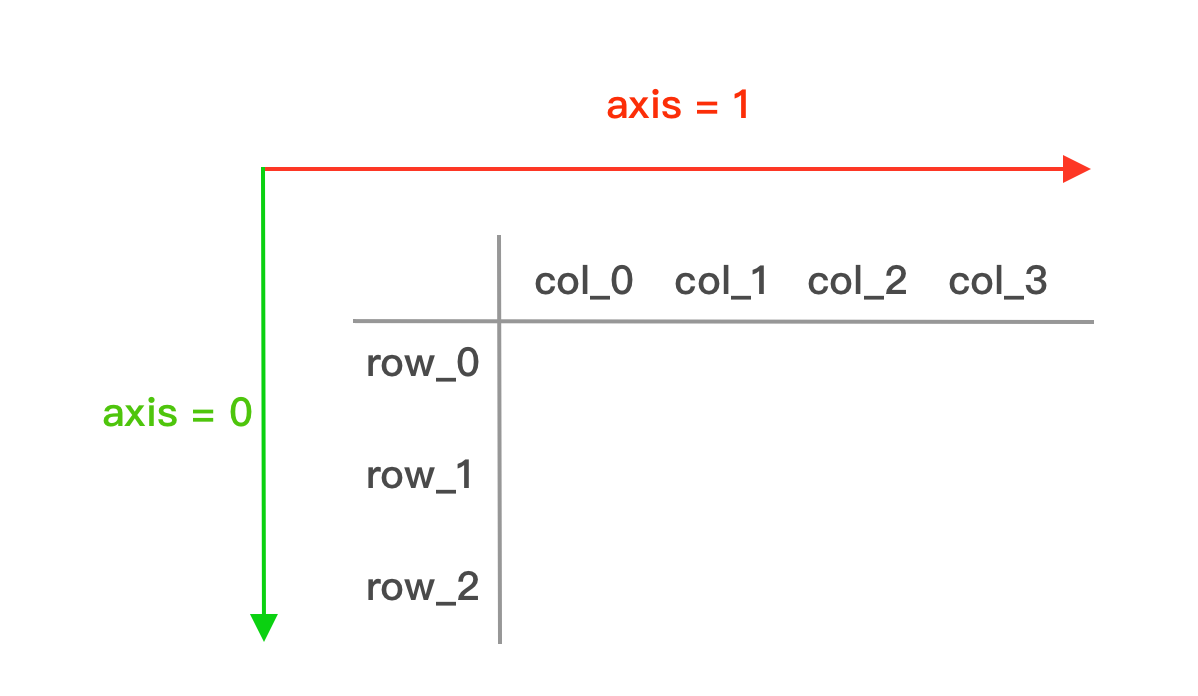
https://stackoverflow.com/questions/22149584/what-does-axis-in-pandas-mean

[행 우선 계산:각 열의 모든 행에 대해서 동작]

(아래쪽으로 연산이 이루어지는 것)
  - axis = 'index' 또는 axis = 0

In [17]:
frame

,b,d,e
Utah,-0.710014,1.690731,-0.406414
Ohio,-0.617738,0.151555,-0.534276
Texas,-0.191664,0.042985,-0.922888
Oregon,0.162220,-0.814882,1.965592


In [18]:
'''
f는 Series의 최대값과 최소값의 차이를 계산하는 람다 함수
함수도 하나의 객체이므로 변수로 가리킬 수 있음
x: parameter. 
x라는 값이 들어오면 그 값에 대해서 max에서 min을 빼서 f에 대입
'''
f = lambda x: x.max() - x.min()
# 각 열에 대해 한번만 수행
frame.apply(f) #axis를 써주지 않으면 default로 axis=0으로 설정

b    0.872235
d    2.505612
e    2.888480
dtype: float64

In [19]:
frame.apply(f, axis='index') 

b    0.872235
d    2.505612
e    2.888480
dtype: float64

In [20]:
frame.apply(f, axis=0)

b    0.872235
d    2.505612
e    2.888480
dtype: float64

[열 우선 계산: 각 행의 모든 열에 대해서 동작]

(가로 방향으로 계산)
  - axis = 'colums' 또는 axis = 1

In [21]:
frame

,b,d,e
Utah,-0.710014,1.690731,-0.406414
Ohio,-0.617738,0.151555,-0.534276
Texas,-0.191664,0.042985,-0.922888
Oregon,0.162220,-0.814882,1.965592


In [22]:
frame.apply(f, axis='columns')

Utah      2.400745
Ohio      0.769293
Texas     0.965874
Oregon    2.780473
dtype: float64

In [23]:
frame.apply(f, axis=1)

Utah      2.400745
Ohio      0.769293
Texas     0.965874
Oregon    2.780473
dtype: float64

[apply 메서드에 전달되는 함수가 여러 값을 가진 Series 반환하기]

In [24]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])
frame.apply(f)

,b,d,e
min,-0.710014,-0.814882,-0.922888
max,0.162220,1.690731,1.965592


In [25]:
frame.apply(f, axis = 1)

,min,max
Utah,-0.710014,1.690731
Ohio,-0.617738,0.151555
Texas,-0.922888,0.042985
Oregon,-0.814882,1.965592


    - applymap: 배열의 각 원소에 적용되는 파이썬 함수 사용가능
       - Series는 각 원소에 적용할 함수를 지정하기 위한 map 메서드를 가지고 있음

[실수 값을 문자열 포맷으로 변환하기]

In [26]:
format = lambda x: '%.2f' % x
frame.applymap(format)

,b,d,e
Utah,-0.71,1.69,-0.41
Ohio,-0.62,0.15,-0.53
Texas,-0.19,0.04,-0.92
Oregon,0.16,-0.81,1.97


[Series의 map 함수]

In [27]:
frame['e'].map(format) #frame의 e index의 값들에 format을 적용

Utah      -0.41
Ohio      -0.53
Texas     -0.92
Oregon     1.97
Name: e, dtype: object

### **2.7 정렬과 순위**

    - sort_index : 로우나 컬럼의 색인을 알파벳순으로 정렬한 새로운 객체를 반환
      - Series
        - 색인으로 정렬
      - DataFrame
        - axis 속성: 
          - 0: 로우의 색인으로 정렬  
          - 1: 컬럼의 색인으로 정렬
        -  ascending 속성: 
          - True: 오름차순 정렬
          - False: 내림차순 정렬

In [28]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj

d    0
a    1
b    2
c    3
dtype: int64

[Series의 정렬]

In [29]:
obj.sort_index() #index기준으로 알파벳순으로 정렬

a    1
b    2
c    3
d    0
dtype: int64

     -  DataFrame은 로우나 컬럼 중 하나의 축을 기준으로 정렬 가능

In [30]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


[DataFrame에서 로우의 색인으로 정렬하기]

In [31]:
frame.sort_index() #index기준으로 one-three로 정렬이 됨됨

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


[DataFrame에서 컬럼의 색인으로 정렬하기]

In [32]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


[DataFrame에서 컬럼의 색인으로 내림차순으로 정렬하기]

In [33]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


    - sort_values : 로우나 컬럼의 값을 알파벳순으로 정렬한 새로운 객체를 반환
      -  Series
        - 정렬할 때 비어있는 값은 기본적으로 가장 마지막에 위치
      -  DataFrame
        - by 옵션
           - 하나 이상의 컬럼에 있는 값으로 정렬
           - 하나 이상의 컬럼 이름을 사용
           - 컬럼 리스트를 전달할 때는 정렬 우선순위에 따라 리스트를 전달



In [34]:
obj = pd.Series([4, 7, -3, 2])
obj.sort_values() #인덱스가 아니라 값을 기준으로 정렬

2   -3
3    2
0    4
1    7
dtype: int64

[비어있는 값이 있는 경우]

In [35]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values() #NaN값은 맨 뒷부분에 위치하게 됨

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

[하나의 컬럼으로 정렬]

In [36]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [37]:
frame.sort_values(by='b') #b의 값을 기준으로 정렬하게 되고, a는 그에 따라서 정렬됨

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


[두 개의 컬럼으로 정렬]

In [38]:
frame.sort_values(by=['a', 'b']) 
'''
a를 기준으로 먼저 정렬함.
0 두개가 먼저 오고, 1 두개가 그 다음에 옴.
그 0 두 개, 1 두 개 각각 안에서 b를 기준으로 오름차순 정렬이 됨.
0 두 개에서는 b가 -3,4순으로, 1 두 개에서는 b가 2,7순으로 정렬이 됨.
'''

'\na를 기준으로 먼저 정렬함.\n0 두개가 먼저 오고, 1 두개가 그 다음에 옴.\n그 0 두 개, 1 두 개 각각 안에서 b를 기준으로 오름차순 정렬이 됨.\n0 두 개에서는 b가 -3,4순으로, 1 두 개에서는 b가 2,7순으로 정렬이 됨.\n'

    - rank:
      -  데이터의 순위를 구하기 
      - 1 부터 배열의 유효한 데이터 개수까지 순서를 매김
      - 기본적으로 동점인 항목에는 평균순위(2등이 2개가 있다고 하면 2.5로 부여함)
      - 오름차순 또는 내림차순으로 순위를 매기기

    

**< 순위의 동률을 처리하는 메서드 >**

|메서드|설명|
|------|----|
|'average'| 기본값. 같은 값을 가지는 항목들의 평균값을 순위로 정함|
|'min'|같은 값을 가지는 그룹을 낮은 순위로 정함|
|'max'|같은 값을 가지는 그룹을 높은 순위로 정함|
|'first'|데이터 내의 위치에 따라 순위를 정함(같은 값이라도 데이터 안에서 뭐가 먼저 있었느냐를 따진 것)|
|'dense'|method = 'min'과 같지만 그룹 내에서 모두 같은 순위를 적용하지 않고 1씩 증가|

In [39]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj.rank() 
'''
오름차순 정렬을 하면 -5, 0,2,4,4,7,7 임.
-5의 index는 1이고, 그 index 1의 rank는 1임.
따라서 0   6.5
              1   1.0 식으로 표현이 된 것.
어떤 것도 정하지 않았을 때 default는 average임
'''

'\n오름차순 정렬을 하면 -5, 0,2,4,4,7,7 임.\n-5의 index는 1이고, 그 index 1의 rank는 1임.\n따라서 0   6.5\n              1   1.0 식으로 표현이 된 것.\n어떤 것도 정하지 않았을 때 default는 average임\n'

In [40]:
# 동률인 경우 그룹내에서 위치에 따라 순위를 적용
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [41]:
'''max: 동률인 경우 그룹내에서 높은 순위를 적용
7이 가장 높으므로 7 두 개가 rank1, rank2를 가져야 할 텐데 
rank1,rank2중 높은 순위(숫자가 큰)를 적용하므로  둘 다 rank2가 적용된다.
'''
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [42]:
#min으로 하면 작은 값 순위로 적용된다
obj.rank(ascending=False, method='min')

0    1.0
1    7.0
2    1.0
3    3.0
4    5.0
5    6.0
6    3.0
dtype: float64

[DataFrame에서 컬럼으로 순위를 정하기]

In [43]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],
                      'c': [-2, 5, 8, -2.5]})
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [44]:
frame.rank(axis='index') #세로줄 안에서 rank를 매기는 것

,b,a,c
0,3.0,1.5,2.0
1,4.0,3.5,3.0
2,1.0,1.5,4.0
3,2.0,3.5,1.0


In [ ]:
frame.rank(axis='columns')
#column방향으로 순위를 정렬함. 가로줄 안에서서 rank를 매기는 것.

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


### **2.8 중복(double label) 색인**

- pandas의 Series나 DataFrame은 중복된 색인을 가질 수 있음

In [45]:
import pandas as pd

obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

     - is_unique 속성: 해당 값이 유일한지 판단

In [46]:
obj.index.is_unique

False

     - 중복된 색인이 있다면 색인을 이용해서 데이터에 접근했을 때 하나의 Series를 반환
     - 중복된 색인이 없다면 색인을 이용해서 데이터에 접근하면 스칼라값을 반환


[중복된 색인이 있는 경우]

In [47]:
obj['a']

a    0
a    1
dtype: int64

[중복된 색인이 없는 경우]

In [48]:
obj['c']

4

      - DataFrame 경우도 동일

In [49]:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])
df

,0,1,2
a,2.033786,0.726628,0.841987
a,-0.819107,-0.725220,1.793296
b,-1.223526,1.188552,-0.977279
b,1.109750,-1.068403,-0.019110


In [50]:
df.loc['b'] #dataframe을 결과로 넘겨주게 됨

,0,1,2
b,-1.223526,1.188552,-0.977279
b,1.109750,-1.068403,-0.019110


## **3. 기술 통계 계산과 요약**

      - 일반적인 수학 메서드와 통계 메서드 제공
      - Series나 DataFrame의 로우나 컬럼에서 단일 값을 구함(요약통계)
        - 누락된 데이터를 제외함

In [51]:
import pandas as pd
import numpy as np

In [52]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


      - sum: DataFrame에서는 각 행 또는 열의 합을 담은 Series를 반환
        - 행의 합: axis = 'index' 또는 axis=0
        - 열의 합: axis = 'column' 또는 axis=1
        - defualt 행의 합

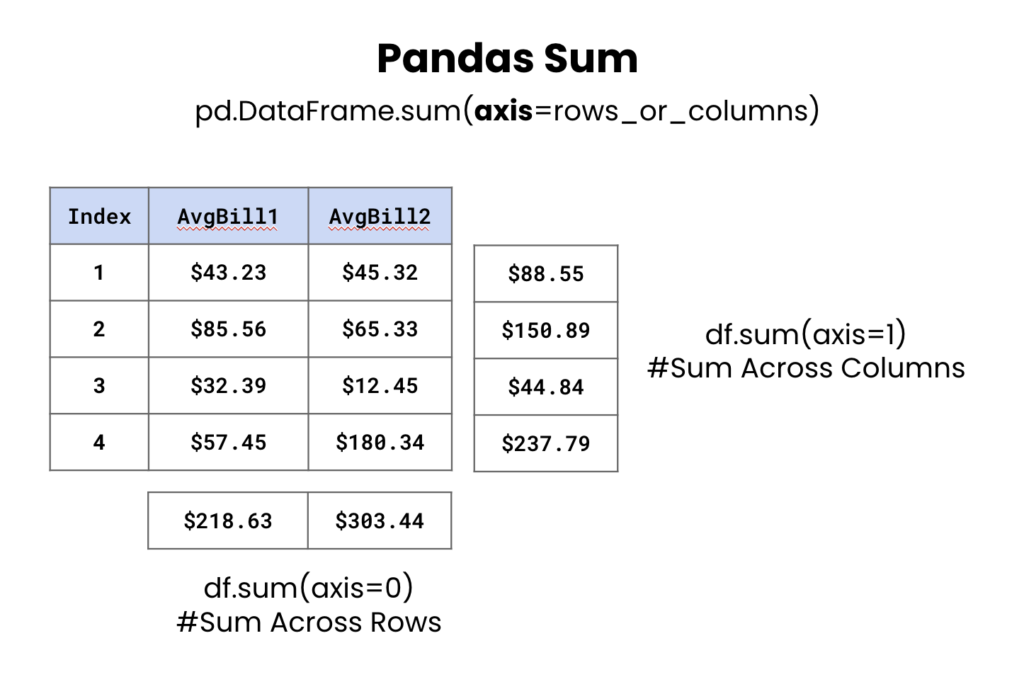
https://www.dataindependent.com/pandas/pandas-sum/

**< 메서드의 옵션 >**

|옵션|설명|
|----|----|
|axis|연산을 수행할 축, DataFrame에서 0 은 로우 1은 컬럼|
|skipna|누락된 값을 제외할 것인지 정하는 옵션, 기본값은 True|


[행의 합]

In [53]:
df.sum() #default는 axis=0

one    9.25
two   -5.80
dtype: float64

In [54]:
df.sum(axis=0)

one    9.25
two   -5.80
dtype: float64

[열의 합]

In [55]:
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

[skipna 옵션 사용]

In [56]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [57]:
df.mean(axis='columns', skipna=False) #skipna=False: NaN값과 다른 값을 연산하게 되면 NaN값이 나옴

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [58]:
df.mean(axis='columns') #skipna=True: 둘 다 NaN일 때만 NaN

a    1.400
b    1.300
c      NaN
d   -0.275
dtype: float64

     - idmax, idmin: 메서드는 최솟값 혹은 최댓값을 가지고 있는 색인값

In [59]:
df.idxmax()

one    b
two    d
dtype: object

In [60]:
df.quantile(0.5) #quantile: 백백분위수 결정 가능. 0.5로 두면 중앙값인 것

one    1.4
two   -2.9
Name: 0.5, dtype: float64

     - cumsum: Series 또는 Dataframe의 축을 따라 누적합을 적용

In [61]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [62]:
df.cumsum(skipna=False)

,one,two
a,1.4,NaN
b,8.5,NaN
c,NaN,NaN
d,NaN,NaN


      - describe: Series 또는 Dataframe의 통계 요약을 반환 

In [63]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [64]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

**< 요약 통계 관련 메서드 >**

|메서드|설명|
|------|----|
|count|NA 값을 제외한 값의 수를 반환|
|describe|Series나 DataFrame의 각 컬럼에 대한 요약 통계를 계산|
|min, max|최솟값과 쵀댓값을 계산|
|idmin, dimax|각각 최솟값과 최댓값을 담고 있는 색인의 값을 반환|
|quantile|0부터 1까지의 분위수를 계산|
|sum|합을 계산|
|mean|평균을 계산|
|median|중간값(50% 분위)을 반환|
|mad|평균값에게 평균절대편차를 계산|
|prod|모든 값의 곱|
|var|표본분산의 값을 계산|
|std|표본표준편차의 값을 계산|
|skew|표본비대칭도(3차 적률)의 값을 계산|
|kurt|표본첨도(4차 적률)의 값을 계산|
|cumsum|누적합을 계산|
|cummin. cummax|각각 누적 최솟값과 누적 최댓값을 계산|
|cumprod|누적곱을 계산|
|diff|1차 산술치를 계산(시계열 데잍 처리 시 유용|
|pct_change|퍼센트 변화율을 계산|